In [ ]:
# Description: This is a sentiment analysis that parses the tweets from Twitter using Python

# Importing the Libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
# Twitter API Credentials
consumerKey = "DnaXPshCp7DmC9oj6JDS6Vi2C"
consumerSecret = "e9m5e8cjLgrgH3wl0Bv3g8ZyeOPHsrZYeuV0cLANAYyE3Y5Atp"
accessToken = "1036644696620118016-GdFu7cpIGPxHhiTf6Y0vVUAKNifd5n"
accessTokenSecret = "LXrdlmDgJaeVStqerk2xo4EC8u3Zcl1qBVEYslaFKnHEp"

In [ ]:
# Create the authentication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret)

# Set the access token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret)

# Create the API obhect while passing in the auth information
api = tweepy.API(authenticate, wait_on_rate_limit=True)

In [ ]:
# Extracting 100 tweets from the twitter user
posts = api.user_timeline(screen_name = "elonmusk", count= 100,lang = "en", tweet_mode ="extended")

# Print the last 10 tweets from the account
print("Show the 10 recent tweets: \n")
i = 1
for tweet in posts[0:10]:
  print(str(i) + ')' + tweet.full_text + '\n')
  i +=1

Show the 10 recent tweets: 

1)@waitbutwhy I strongly supported Obama for President, but today’s Democratic Party has been hijacked by extremists

2)@WholeMarsBlog No further TSLA sales planned after today

3)@MichaelDell @Twitter @Dell @emc 🤣

4)“Real magic is only a sip away.”
(Actual slogan of Coca-Cola!!) 🤣🤣

5).@CocaCola Oh hi lol https://t.co/VhhVM9GzLJ

6)@BillyM2k Same

7)https://t.co/Q9OjlJhi7f

8)@walterkirn Freedom of speech means freedom of speech

9)@scrowder Discomforting

10)@DavidSacks @willcain Accurate interview



In [ ]:
#Create a dataframe with a column called Tweets
df = pd.DataFrame([tweet.full_text for tweet in posts], columns = ['Tweets'])

#Show the first 5 rows of data
df.head(10)

,Tweets
0,@waitbutwhy I strongly supported Obama for Pre...
1,@WholeMarsBlog No further TSLA sales planned a...
2,@MichaelDell @Twitter @Dell @emc 🤣
3,“Real magic is only a sip away.”\n(Actual slog...
4,.@CocaCola Oh hi lol https://t.co/VhhVM9GzLJ
5,@BillyM2k Same
6,https://t.co/Q9OjlJhi7f
7,@walterkirn Freedom of speech means freedom of...
8,@scrowder Discomforting
9,@DavidSacks @willcain Accurate interview


In [ ]:
#Cleaning the text

#Create a function to clean the tweets
def cleanTxt(text):
  text = re.sub(r'@[A-Za-z0-9]+','', text) #Removed @mentions
  text = re.sub(r'#', '', text) #Removed # symbols
  text = re.sub(r'RT[\s]+', '', text) #Removed RT
  text = re.sub(r'https?:\/\/S+','', text) #Removed the hyper link
  text = re.sub(r'https://+', '', text)
  return text
  
df['Tweets']=df['Tweets'].apply(cleanTxt)
df #Showing the cleaned text



,Tweets
0,"I strongly supported Obama for President, but..."
1,No further TSLA sales planned after today
2,🤣
3,“Real magic is only a sip away.”\n(Actual slog...
4,. Oh hi lol t.co/VhhVM9GzLJ
5,Same
6,t.co/Q9OjlJhi7f
7,Freedom of speech means freedom of speech
8,Discomforting
9,Accurate interview


In [ ]:
# Create a function to get the subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

# Create two new columns
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

# Show the new dataframe with new columns
df


,Tweets,Subjectivity,Polarity
0,"I strongly supported Obama for President, but...",0.733333,0.433333
1,No further TSLA sales planned after today,0.500000,0.000000
2,🤣,0.000000,0.000000
3,“Real magic is only a sip away.”\n(Actual slog...,0.700000,0.250000
4,. Oh hi lol t.co/VhhVM9GzLJ,0.700000,0.800000
5,Same,0.125000,0.000000
6,t.co/Q9OjlJhi7f,0.000000,0.000000
7,Freedom of speech means freedom of speech,0.000000,0.000000
8,Discomforting,0.000000,0.000000
9,Accurate interview,0.633333,0.400000


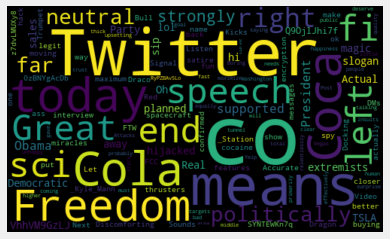

In [ ]:
#how wel the sentiments are distributed

# Plot Word cloud
allWords= ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width = 500,height= 300, random_state =21,max_font_size=110).generate(allWords)

plt.imshow(wordCloud, interpolation= "bilinear")
plt.axis('off')
plt.show()

In [ ]:
#Create a function to compute the negative, neutral and positive analysis
def getAnalysis(score):
  if score<0:
    return 'Negative'
  elif score == 0:
   return 'Neutral'
  else:
    return 'Positive'	

df['Analysis'] =df['Polarity'].apply(getAnalysis)

#Show the dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,"I strongly supported Obama for President, but...",0.733333,0.433333,Positive
1,No further TSLA sales planned after today,0.500000,0.000000,Neutral
2,🤣,0.000000,0.000000,Neutral
3,“Real magic is only a sip away.”\n(Actual slog...,0.700000,0.250000,Positive
4,. Oh hi lol t.co/VhhVM9GzLJ,0.700000,0.800000,Positive
5,Same,0.125000,0.000000,Neutral
6,t.co/Q9OjlJhi7f,0.000000,0.000000,Neutral
7,Freedom of speech means freedom of speech,0.000000,0.000000,Neutral
8,Discomforting,0.000000,0.000000,Neutral
9,Accurate interview,0.633333,0.400000,Positive


In [ ]:
# Print all of the positive tweets
j=1
sortedDF =df.sort_values(by=['Polarity'])
for i in range(0,sortedDF.shape[0]):
  if (sortedDF['Analysis'][i]== 'Positive'):
    print(str(j)+ ')' +sortedDF['Tweets'][i])
    print()
    j+=1   

1) I strongly supported Obama for President, but today’s Democratic Party has been hijacked by extremists

2)“Real magic is only a sip away.”
(Actual slogan of Coca-Cola!!) 🤣🤣

3). Oh hi lol t.co/VhhVM9GzLJ

4)  Accurate interview

5)  Great show!

6) Trumpet is legit a way better name

7)Listen, I can’t do miracles ok t.co/z7dvLMUXy8

8)Let’s make Twitter maximum fun!

9) Some sci-fi that actually features sci-fi would be great

10): Docking confirmed! t.co/RyPZBAv5Lo

11) Attacks are coming thick and fast, primarily from the left, which is no surprise, however I should be clear that the right will probably be a little unhappy too.

My goal is to maximize area under the curve of total human happiness, which means the ~80% of people in the middle.

12)For Twitter to deserve public trust, it must be politically neutral, which effectively means upsetting the far right and the far left equally

13)  The Washington Post targets me relentlessly! 

Their insults could be higher quality, but 

In [ ]:
#print the negative tweets
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending='False')
for i in range(0,sortedDF.shape[0]):
  if(sortedDF['Analysis'][i] == 'Negative'):
    print(str(j)+')'+sortedDF['Tweets'][i])
    print()
    j+=1

1)  Vegas Boring Co tunnel



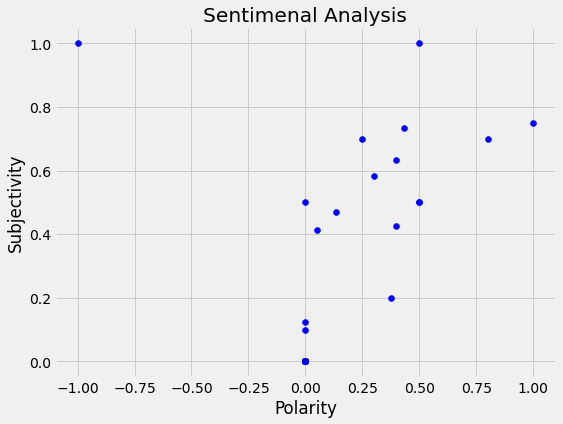

In [ ]:
# Plot the polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
  plt.scatter(df['Polarity'][i],df['Subjectivity'][i],color='Blue')

plt.title('Sentimenal Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [ ]:
# Get the percentage of positive tweets
ptweets = df[df.Analysis=='Positive']
ptweets = ptweets['Tweets']

round( (ptweets.shape[0] / df.shape[0]) *100,1)

43.3

In [ ]:
# Get the percentage of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']
round( (ntweets.shape[0]/ df.shape[0]) *100,1)

3.3

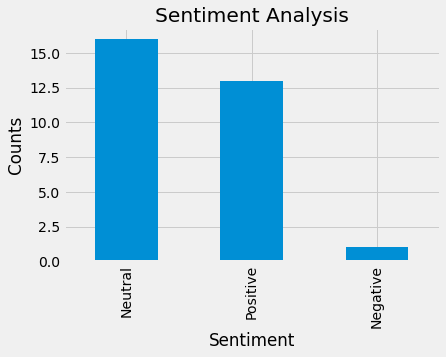

In [ ]:
# Show the value counts

df['Analysis'].value_counts()

# plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()